# Machine Learning & Statistics

# Tasks 2020

#### Lecturer: Ian McLoughlin


#### Damien Connolly
#### G00340321

******************************************************************************************************************************
## Task 1 - sqrt2

#### Task
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library1 or otherwise. You should research the task first and include references and a description of your algorithm.

#### Solution
A square root of a number is a value that, when multiplied by itself it gives the original number. The square root of 2 is an irrational number as it cannot be expressed as an integer divided by another interger. Rational numbers are numbers that can be seen as one integer over another. The square root of most numbers is an irrational number with an infinite decimal expansion. As a result, the decimal expansion of any square root can only be computed to finite-precision approximation[1]. Python can be used to calculate the square root of a number in several ways through the use of its many libraries. However the square root can still be calculated without using any of its imported libraries. There are many different methods of computing the square root and at its simplest the square root of 2 can be calculated as one-half to the power of 2, written in mathematics as[2]: 
                                     
                                    
$$ \sqrt{2} $$
***************************************************************************************************************************


In [1]:
# Simple function to calculate the square root

def sqrt(n): 
    ans = n ** (1/2)
    return ans
    print ("The square root of the number is", ans,)
    
sqrt(2)

1.4142135623730951

#### Newtons method

Newtons method, which is also known as Newton-Raphson method, is a root finding algorithm that produces successively better approximations of the roots of a real valued function. The algorithm starts with a guess and computes the sequence of improved guesses[3]. This method is often used to quickly calculate the square root of a number but is often problematic when rounding numbers and the same algorithm will often produce two different results on different computers[4].

$$ x_{n} + 1 = \frac{1}{2} (x_{n} + \frac{a}{x_{n}}) $$

In [4]:
# Using Newtons method

def newtonsmethod(x):
    
    z = x/2
    
    while abs(x - (z * z)) > 0.001:
        
        z -= (z*z - x) / (2*z)
        
    return (round(z, 10))
    

newtonsmethod(2)

1.4142156863

#### Babylonian Method

The Babylonian method to find square root is based on the Newton- Raphson method for solving non-linear equations. The idea is simple, starting from an arbitrary value of x, and y as 1, we can simply get next approximation of root by finding the average of x and y. Then the y value will be updated with  number / x [5]. 

In [3]:
# Example using Babylonian method [6]

def BabylonianAlgorithm(number):
    if(number == 0):
        return 0;

    g = number/2.0;
    g2 = g + 1;
    while(g != g2):
        n = number/ g;
        g2 = g;
        g = (g + n)/2;
    return (round(g, 100))


BabylonianAlgorithm(2)

1.414213562373095

Both of these methods give us slightly different results as the decimal places get larger and both functions will only allow a certain number of decimal places. We must now get the square root of 2 extended to 100 decimal places. 


#### Calculate to 100 decimal places
Below is a function that will allow us to do this by calculating the square root of an integer to digits of precision. It works by finding the integer square root of a after multiplying by 10 raised to the 2 x digits. The result must be converted to a string and have the decimal point added at the correct location if it is to be displayed correctly[7].

In [29]:
# Function that calculates and prints to the screen the square root of 2 to 100 decimal places [7].  

def sqrt2(a, digits):
    a = a * (10**(2*digits))
    x_prev = 0
    x_next = 1 * (10**digits)
    while x_prev != x_next:
        x_prev = x_next
        x_next = (x_prev + (a // x_prev)) >> 1
        x = str(x_next)
    print(x[0]+"."+x[1:])
    
sqrt2(2, 100)



1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [31]:
sqrt2(5, 100)

2.2360679774997896964091736687312762354406183596115257242708972454105209256378048994144144083787822749


In [33]:
sqrt2(16, 100)

4.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


#### References:

[1]. https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[2]. https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

[3]. https://en.wikipedia.org/wiki/Square_root_of_2

[4]. https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/

[5]. https://www.tutorialspoint.com/Babylonian-method-to-find-the-square-root

[6]. https://www.w3resource.com/python-exercises/math/python-math-exercise-18.php

[7]. https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2/5189881#5189881
****************************************************************************************************************************

<br/>

## Task 2 - Chi-Squared

#### Task
The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.


|             |  A  |   B |   C |   D | Total|
|------------ | --- | --- | --- | --- | -----|
|White collar |  90 |  60 | 104 |  95 |   349| 
|Blue collar  |  30 |  50 |  51 |  20 |   151| 
|No collar    |  30 |  40 |  45 |  35 |   150| 
|Total        | 150 | 150 | 200 | 150 |   650|

#### Solution
Many test statistics are approximately distributed as Chi Square. Two of the more common tests using the Chi Square distribution are the test of independence for data and the goodness of fit for a model. The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables and the goodness of fit test measures whether there is a difference between the experimental (observed) value and the theoretical (expected) value[1]. Chi Square distribution is used as a basis to verify the hypothesis. It has two parameters:

   * df - degree of freedom
   
    
   * size - Shape of returned array

When df independent random variables, each with standard normal distributions (mean 0, variance 1), are squared and summed, the resulting distribution is chi-square.[2]

In [23]:
# Import libraries
import numpy as np
from scipy import stats
import pandas as pd

# Create a data frame  and display table [3]
data = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])

df = pd.DataFrame(data, index=["White Collar", "Blue Collar", "No Collar"], columns=["A", "B", "C", "D"])          
df

,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


In [24]:
# The Chi-squared value based on it is approximately 24.6. Verify this value and calculate the associated p value
# Run the Chi2 test 
chi2_test = stats.chi2_contingency(df)
chi2_test

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

In [26]:
# Perform Chi2 test and assign correct variables [4]

chi2_stat, p_val, dof, ex = stats.chi2_contingency(data)

print(f"===Chi2 Stat===: {chi2_stat}\n")
print(f"===P-Value===: {p_val}\n")
print(f"===Degrees of Freedom===: {dof}\n")
print(f"===Contingency Table===:\n {ex}")

===Chi2 Stat===: 24.5712028585826

===P-Value===: 0.0004098425861096696

===Degrees of Freedom===: 6

===Contingency Table===:
 [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


<br/>
From the results it can be seen that the Chi-squared value is approximately 24.6, the same value that was mentioned at the beginning of the task. The p-value is very low at 0.0004098425861096696. A p-value less than 0.05 is considered to be statistically significant and a p-value less than 0.001 to be highly significant [5]. The p-value in this case is even lower at 0.0004 meaning we can reject the null hypotheses that the categories are independent of each other. 

#### References:

[1]. http://onlinestatbook.com/2/chi_square/distribution.html

[2]. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

[3]. https://stackoverflow.com/questions/18022845/pandas-index-column-title-or-name/60909202#60909202 

[4]. https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

[5]. https://www.statsdirect.com/help/basics/p_values.htm
*******************************************************************************************************************************

<br/>

## Task 3 - Standard Deviation

#### Task
The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).
However, Microsoft Excel has two different versions of the standard deviation
calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence.

#### Solution
The standard deviation is a measure of the amount of variance or dispersion of a dataset relative to its mean. It is used to evaluate how far the data is spread from the mean of the data sample and it is calculated as the square root of the variance. A high deviation within the data set means the data points are further from the mean, meaning the more spread out the data is then the higher the standard deviation. A low standard deviation indicates that the values tend to be close to the mean[1].

STDEV.P and STDEV.S are two microsoft excel functions used to calculate the standard deviation. STDEV.P calculates the standard deviation based on the entire population given as an argument. STDEV.P assumes that its arguments are the entire population so if your data represents a sample of the population then compute the standard deviation using STDEV.S. STDEV.S is used to estimate the standard deviation based on a sample of the population[2].

When using the STDEV.P function the squared deviation is divided by the total number of arguments, mostly represented as N.
In STDEV.S the squared deviation is divided by the total number of sample -1. It is represented as N-1.

To make NumPy's std function behave like Excel's STDEV.S pass in the value ddof=1.(np.std(population, ddof=1)




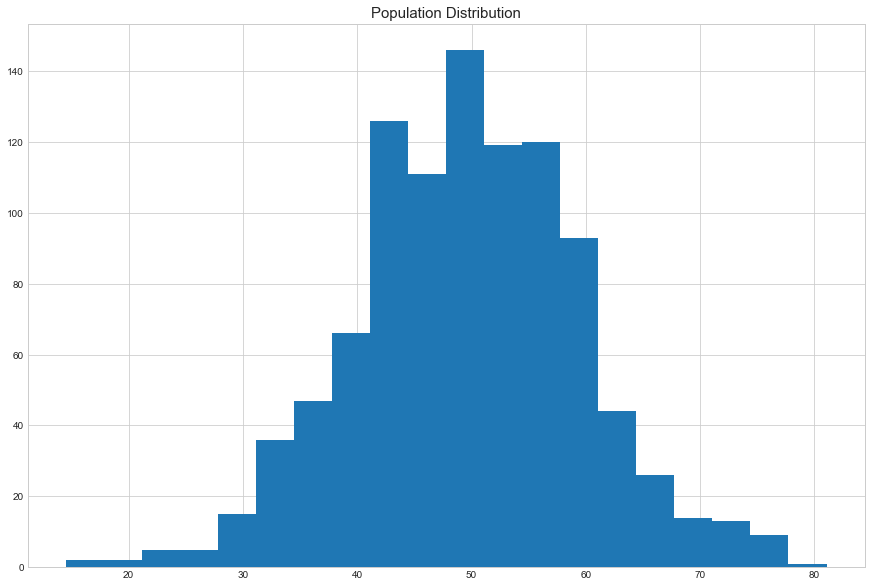

In [14]:
# Use numpy to perform a simulation demonstrating that the STDEV.S calculation 
# is a better estimate for the standard deviation of a population when performed on a sample.

# import packages to be used
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Generate a population of random values with a uniform distribution

# Set the mean, the standard deviation and population size
mean = 50
sd = 10
size = 1000

# Simulate population using numpy
population = np.random.normal(mean,sd,size)
#population

# Display distribution of population
figure = plt.hist(population, bins=20)
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15, 10)
plt.title("Population Distribution", fontsize = 15)
plt.show()

In [23]:
# Calculate the standard deviation using the STDEV.P function (np.sqrt(np.sum((x - np.mean(x))**2)/len(x)))
np.sqrt(np.sum((population - np.mean(population))**2)/len(population))

9.875553901326482

In [24]:
# Calculate the standard deviation of the enitre population using STDEV.S method
np.std(population, ddof=1)

9.880495384698671

In [36]:
# Calculate the standard deviation using a sample of the population using STDEV.S method

# Generate a sample
sample = np.random.choice(population, size=500)

# Get the standard deviation using STDEV.P method
np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample))

9.576467253753322

In [37]:
# Get the standard deviation using STDEV.S method
np.std(sample, ddof=1)

9.586058109691097

In [58]:
# Generate multiple samples to compare methods

samplesize = [10, 25, 50, 100, 200, 400, 500, 600, 750, 900]
sampleresults = []
for s in samplesize:
    samples =  np.random.choice(population, size=s)
    sampleresults.append([size, s, np.mean(samples), np.std(population), np.sqrt(np.sum((samples - np.mean(samples))**2)/len(samples)),
                          np.sqrt(np.sum((samples - np.mean(samples))**2)/(len(samples)-1))])

sampleresults

[[1000,
  10,
  53.52638958088412,
  9.875553901326482,
  12.469236434541138,
  13.14372927210235],
 [1000,
  25,
  51.09154319328899,
  9.875553901326482,
  11.984556126716557,
  12.231686376750625],
 [1000,
  50,
  50.497080911913166,
  9.875553901326482,
  9.646536910912996,
  9.744473806675586],
 [1000,
  100,
  50.66723183802218,
  9.875553901326482,
  10.250819226177429,
  10.30246095969449],
 [1000,
  200,
  49.45852407777705,
  9.875553901326482,
  9.949242697835576,
  9.974209469080746],
 [1000,
  400,
  49.345641808093895,
  9.875553901326482,
  9.65550217309148,
  9.667594228140432],
 [1000,
  500,
  49.31883936972483,
  9.875553901326482,
  9.827180763082923,
  9.837022709228174],
 [1000,
  600,
  49.72974426386211,
  9.875553901326482,
  9.499001860772518,
  9.506927604212942],
 [1000,
  750,
  49.66757659965276,
  9.875553901326482,
  9.836814873856898,
  9.843379315611093],
 [1000,
  900,
  49.51514125784336,
  9.875553901326482,
  9.613419158432833,
  9.618764401636192]

In [60]:
# Use pandas to display reults in a dataframe
df = pd.DataFrame(sampleresults, columns=["Population","Size of Sample","Mean of sample","Std Population","STDEV.P","STDEV.S"])

# Calculate the difference between standard deviation methods and add to dataframe
df['STDEV.P Difference'] = ((df['STDEV.P'] - df['Std Population']).abs())/df['Std Population']
df['STDEV.S Difference'] = ((df['STDEV.S'] - df['Std Population']).abs())/df['Std Population']

# Display dataframe
df

,Population,Size of Sample,Mean of sample,Std Population,STDEV.P,STDEV.S,STDEV.P Difference,STDEV.S Difference
0,1000,10,53.526390,9.875554,12.469236,13.143729,0.262637,0.330936
1,1000,25,51.091543,9.875554,11.984556,12.231686,0.213558,0.238582
2,1000,50,50.497081,9.875554,9.646537,9.744474,0.023190,0.013273
3,1000,100,50.667232,9.875554,10.250819,10.302461,0.037999,0.043229
4,1000,200,49.458524,9.875554,9.949243,9.974209,0.007462,0.009990
5,1000,400,49.345642,9.875554,9.655502,9.667594,0.022282,0.021058
6,1000,500,49.318839,9.875554,9.827181,9.837023,0.004898,0.003902
7,1000,600,49.729744,9.875554,9.499002,9.506928,0.038130,0.037327
8,1000,750,49.667577,9.875554,9.836815,9.843379,0.003923,0.003258
9,1000,900,49.515141,9.875554,9.613419,9.618764,0.026544,0.026003


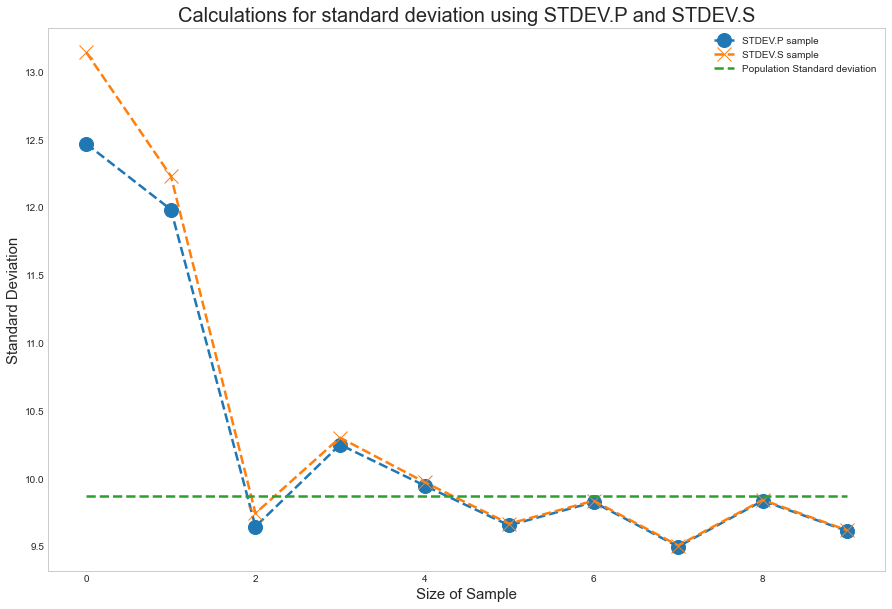

In [72]:
# Plot the calculations

# Customise with rcparams 
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['lines.linewidth'] = 2.5
x = ['Size of Sample']

# Add the data to be plotted 
plt.plot(df['STDEV.P'], marker = 'o', markersize = 14, label = 'STDEV.P sample')
plt.plot(df['STDEV.S'], marker = 'x', markersize = 14, label = 'STDEV.S sample')
plt.plot(df['Std Population'], label = 'Population Standard deviation')

# Add labels for the x and y axis and a plot title
plt.title("Calculations for standard deviation using STDEV.P and STDEV.S", fontsize = 20)
plt.xlabel("Size of Sample", fontsize = 15)
plt.ylabel("Standard Deviation", fontsize = 15)

# Add a legend and grid to the plot
plt.legend()
plt.grid()

REF:

[1]. https://www.investopedia.com/terms/s/standarddeviation.asp

[2]. https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

[3]. https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

https://matplotlib.org/tutorials/introductory/customizing.html

https://stackoverflow.com/questions/34133939/is-there-any-difference-between-numpy-std-and-excel-stdev-function

https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/a/calculating-standard-deviation-step-by-step

https://www.exceltip.com/statistical-formulas/how-to-use-stdev-s-function-in-excel.html

https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html#numpy.random.choice

<br/>
<br/>

## Task 4 - KNN
    
Use scikit-learn to apply k-means clustering to
Fisher’s famous Iris data set. You will easily obtain a copy of the data set online.
Explain in a Markdown cell how your code works and how accurate it might
be, and then explain how your model could be used to make predictions of species
of iris.

In [10]:
# import libraries 

import sklearn.neighbors as nei
import pandas as pd
import sklearn.model_selection as mod
import seaborn as sns

In [11]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/master/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


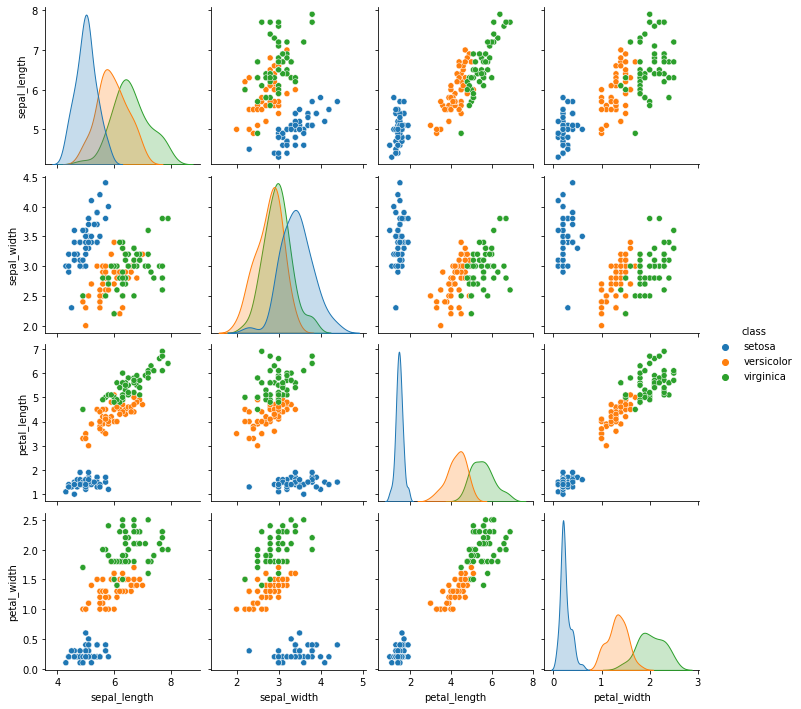

In [12]:
# visualise the data with a pair plot

sns.pairplot(df, hue="class")

In [13]:
# Set the inputs and outputs

inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['class']

In [14]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [18]:
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [19]:
# Predict 

df.loc[101]

sepal_length          5.8
sepal_width           2.7
petal_length          5.1
petal_width           1.9
class           virginica
Name: 101, dtype: object

In [20]:
knn.predict([[5.6, 2.8, 4.9, 2.0]])

array(['virginica'], dtype=object)

In [21]:
# Evaluate 

(knn.predict(inputs) == outputs).sum()

145

In [22]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [23]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [24]:
(knn.predict(inputs_test) == outputs_test).sum()

48